## Vectores y Superposición: La Esencia de la Linealidad

## Resumen

La noción de superposición es el principio estructural que define la linealidad. Un sistema es lineal si las combinaciones aditivas y escalares de sus estados producen respuestas que respetan esas mismas combinaciones. Este principio, aparentemente simple, gobierna fenómenos tan diversos como la interferencia de ondas, la evolución de sistemas dinámicos, la propagación de señales, el entrenamiento de modelos de aprendizaje automático y la formulación matemática de la mecánica cuántica.
En este documento se establece una interpretación unificada de los vectores como estados, se formaliza el principio de superposición y se demuestra su implementación computacional rigurosa mediante Python.


## 1. Superposición como definición de linealidad

Sea $V$ un espacio vectorial y $T: V \to W$ una transformación.
La transformación $T$ es lineal si y solo si satisface simultáneamente:

$$
T(u + v) = T(u) + T(v)
\\
T(\alpha v) = \alpha T(v)
$$

para todo $u, v \in V$ y todo escalar $\alpha$.

Estas dos identidades no son propiedades adicionales:
**constituyen la definición misma de linealidad**.

## 2. Vectores como estados

Un vector no es una flecha por definición.
Un vector es un **estado** de un sistema lineal.

Ejemplos conceptualmente equivalentes:

* un estado físico (posición, velocidad, amplitud cuántica),
* una señal (audio, imagen, tiempo),
* un dato (features de un modelo),
* una configuración de un sistema dinámico.

En computación, estos estados se representan como arreglos numéricos.

In [5]:
pip install numpy matplotlib

  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-12.1.0-cp313-cp313-win_amd64.whl (7.0 MB)

   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   --

In [2]:
import numpy as np

u = np.array([1.0, 2.0])
v = np.array([3.0, -1.0])

u, v

(array([1., 2.]), array([ 3., -1.]))

Interpretación matemática:

* $u, v \in \mathbb{R}^2$
* cada uno representa un estado posible del sistema

## 3. Combinaciones lineales

Una combinación lineal de vectores $v_1, \dots, v_n$ es toda expresión de la forma:

$$
\alpha_1 v_1 + \alpha_2 v_2 + \dots + \alpha_n v_n
$$

Las combinaciones lineales describen **todos los estados accesibles** mediante superposición.

In [3]:
alpha = 2.0
beta = -0.5

w = alpha * u + beta * v
w

array([0.5, 4.5])

Interpretación:

* el nuevo estado es una superposición ponderada
* no se introduce ninguna operación externa al sistema lineal

## 4. Visualización geométrica en 2D

La interpretación geométrica permite observar directamente la superposición.

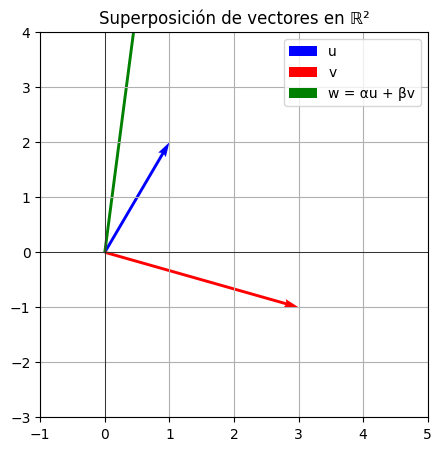

In [6]:
import matplotlib.pyplot as plt

origin = np.zeros(2)

plt.figure(figsize=(5,5))
plt.quiver(*origin, *u, angles='xy', scale_units='xy', scale=1, color='blue', label='u')
plt.quiver(*origin, *v, angles='xy', scale_units='xy', scale=1, color='red', label='v')
plt.quiver(*origin, *w, angles='xy', scale_units='xy', scale=1, color='green', label='w = αu + βv')

plt.xlim(-1,5)
plt.ylim(-3,4)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.legend()
plt.title("Superposición de vectores en ℝ²")
plt.show()

Conclusión geométrica:

* el espacio accesible está generado por combinaciones lineales
* la estructura es aditiva y escalable

## 5. Visualización conceptual en 3D

En dimensiones superiores, la interpretación geométrica directa se pierde, pero la estructura algebraica permanece.

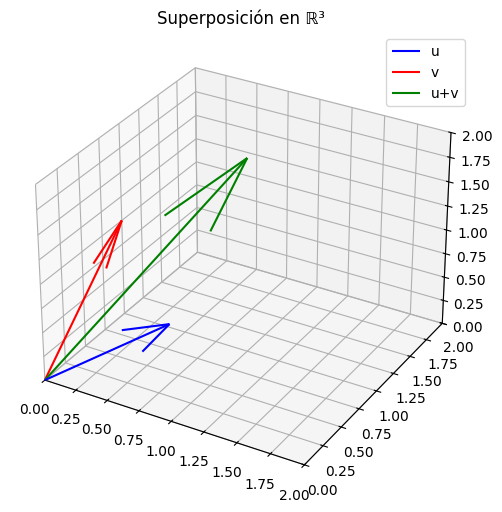

In [7]:
from mpl_toolkits.mplot3d import Axes3D

u3 = np.array([1, 0, 1])
v3 = np.array([0, 1, 1])
w3 = u3 + v3

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0,0,0, *u3, color='blue', label='u')
ax.quiver(0,0,0, *v3, color='red', label='v')
ax.quiver(0,0,0, *w3, color='green', label='u+v')

ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.set_zlim([0,2])
ax.set_title("Superposición en ℝ³")

plt.legend()
plt.show()

La pérdida de visualización directa no implica pérdida de estructura:
el álgebra sigue siendo exacta.

## 6. Transformaciones lineales como operadores sobre estados

Una transformación lineal actúa sobre estados y preserva la superposición.

Sea una transformación $T$ representada por una matriz $A$.

In [8]:
A = np.array([
    [2, 0],
    [1, 1]
])

Aplicación sobre vectores:

In [9]:
Tu = A @ u
Tv = A @ v
Tuv = A @ (u + v)

Tu, Tv, Tuv

(array([2., 3.]), array([6., 2.]), array([8., 5.]))

## 7. Verificación computacional de la superposición aditiva

In [10]:
Tuv, Tu + Tv

(array([8., 5.]), array([8., 5.]))

Resultado:
$$
T(u+v) = T(u) + T(v)
$$

La igualdad no es aproximada ni empírica:
es estructural.

## 8. Verificación computacional de la homogeneidad

In [11]:
alpha = 3.5

T_alpha_v = A @ (alpha * v)
alpha_Tv = alpha * (A @ v)

T_alpha_v, alpha_Tv

(array([21.,  7.]), array([21.,  7.]))

Resultado:
$$
T(\alpha v) = \alpha T(v)
$$

## 9. Interpretación computacional del principio de superposición

En términos computacionales:

* una matriz representa un operador,
* los vectores representan estados,
* el producto matricial representa la acción del operador.

El principio de superposición garantiza que:

* el sistema no introduce distorsión estructural,
* las combinaciones de entrada producen combinaciones de salida,
* la dinámica es predecible y descomponible.

## 10. Alcance físico, computacional y conceptual

La superposición explica por qué:

* las ondas interfieren,
* los sistemas lineales pueden descomponerse en modos,
* los modelos lineales son interpretables,
* los estados cuánticos se combinan linealmente,
* los algoritmos numéricos escalan.

Toda violación de la superposición implica:

* no linealidad,
* aparición de fenómenos emergentes,
* ruptura de análisis espectral simple.

## 11. Principio de cierre estructural

La linealidad no es una aproximación:
es una estructura.

Los vectores no son datos:
son estados.

Las matrices no son tablas:
son operadores.

La superposición no es una propiedad adicional:
es el criterio que define el dominio lineal.

Este capítulo establece el núcleo conceptual sobre el cual se construyen:

* los espacios vectoriales,
* las transformaciones,
* los espectros,
* y toda la teoría que sigue.